# Load Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Supermarket/Supermarket Sales.csv')
display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019


In [3]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,8.693563,0.835254,0.0
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0


In [4]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [5]:
df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [6]:
df.to_csv("supermarket_fix.csv", index=False)

# EDA

In [7]:
print("Total transaksi:", len(df))
print("Total revenue:", df["Total"].sum())
print("Rata rating:", df["Rating"].mean())

Total transaksi: 1000
Total revenue: 322966.749
Rata rating: 6.9727


In [8]:
df.groupby("City")["Total"].sum().sort_values(ascending=False)

,Total
City,
Naypyitaw,110568.7065
Yangon,106200.3705
Mandalay,106197.6720


In [9]:
df.groupby("Product line")["Total"].sum().sort_values(ascending=False)

,Total
Product line,
Food and beverages,56144.8440
Sports and travel,55122.8265
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Home and lifestyle,53861.9130
Health and beauty,49193.7390


In [10]:
df["Payment"].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


In [11]:
df.groupby("Customer type")["Total"].mean()

,Total
Customer type,
Member,327.791305
Normal,318.122856


# Visualisasi

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-874133382.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


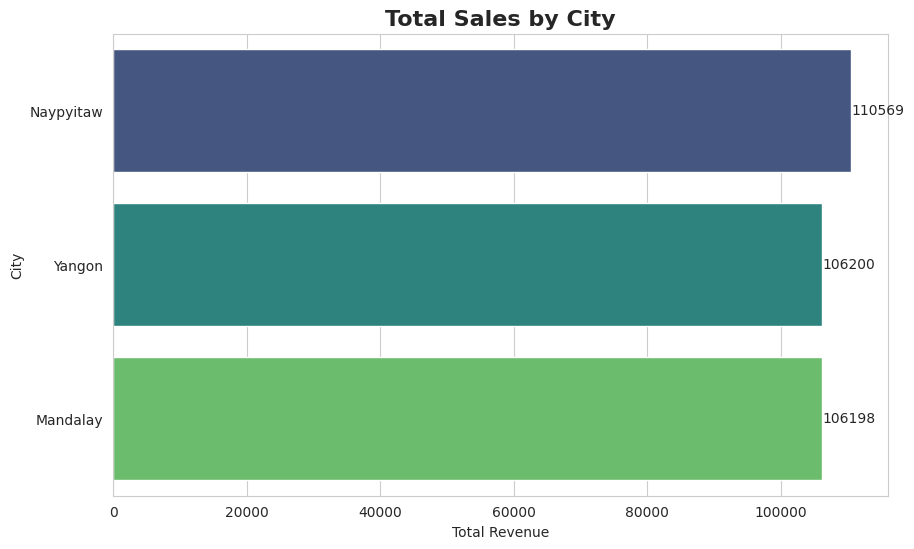

In [15]:
city_sales = df.groupby("City")["Total"].sum().sort_values(ascending=False)

plt.figure()
ax = sns.barplot(
    x=city_sales.values,
    y=city_sales.index,
    palette="viridis"
)

plt.title("Total Sales by City", fontsize=16, fontweight="bold")
plt.xlabel("Total Revenue")
plt.ylabel("City")

# tampilkan angka di bar
for i, v in enumerate(city_sales.values):
    ax.text(v, i, f"{v:.0f}", va="center")

plt.show()

Kota dengan revenue tertinggi adalah **Naypyitaw**.
Hal ini menunjukkan permintaan tinggi di wilayah tersebut.
Perusahaan dapat meningkatkan promosi atau membuka cabang baru.

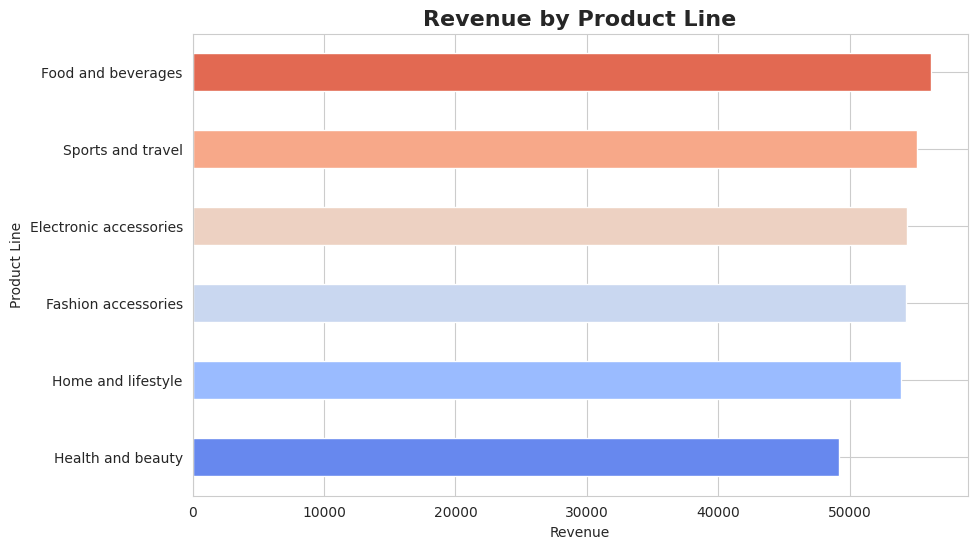

In [16]:
product_sales = df.groupby("Product line")["Total"].sum().sort_values()

plt.figure()
product_sales.plot(
    kind="barh",
    color=sns.color_palette("coolwarm", len(product_sales))
)

plt.title("Revenue by Product Line", fontsize=16, fontweight="bold")
plt.xlabel("Revenue")
plt.ylabel("Product Line")
plt.show()

Product line **Food and Beverages** menghasilkan revenue tertinggi.
Produk ini memiliki demand besar di market.
Perusahaan dapat meningkatkan stok dan strategi pemasaran.

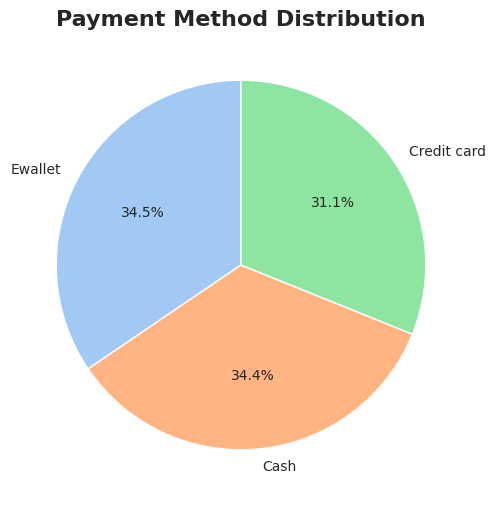

In [17]:
payment = df["Payment"].value_counts()

plt.figure()
plt.pie(
    payment,
    labels=payment.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("pastel"),
    startangle=90,
    wedgeprops={"edgecolor": "white"}
)

plt.title("Payment Method Distribution", fontsize=16, fontweight="bold")
plt.show()

Mayoritas customer menggunakan metode pembayaran **E-Wallet**.
Ini menunjukkan preferensi customer terhadap metode tersebut.
Perusahaan harus memastikan sistem pembayaran ini optimal.

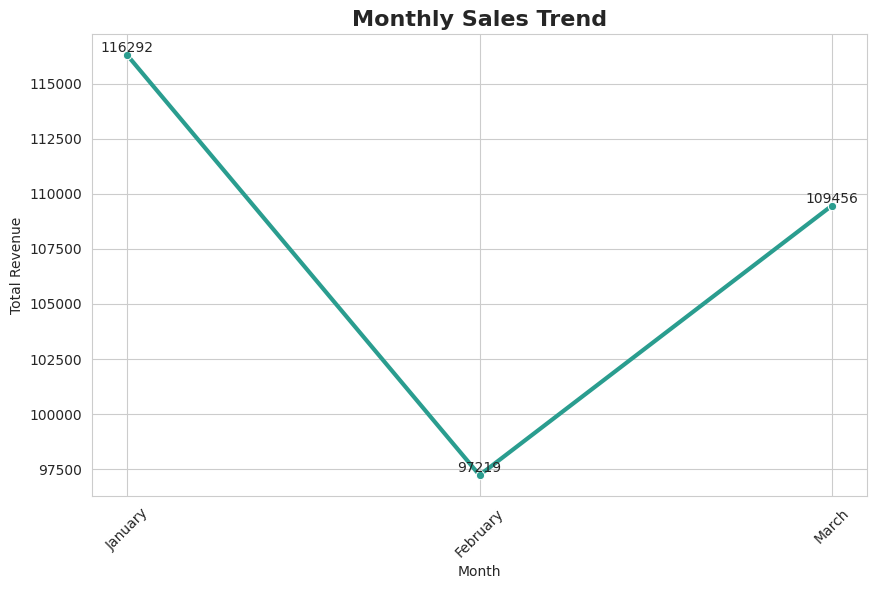

In [28]:
# buat kolom nama bulan dari Date
df["Month Name"] = df["Date"].dt.month_name()

# urutan bulan agar tidak acak
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

# group data
monthly_sales = df.groupby("Month Name")["Total"].sum()

# urutkan bulan
monthly_sales = monthly_sales.reindex(month_order).dropna()

# plot
plt.figure(figsize=(10,6))
sns.lineplot(
    x=monthly_sales.index,
    y=monthly_sales.values,
    marker="o",
    linewidth=3,
    color="#2a9d8f"
)

plt.title("Monthly Sales Trend", fontsize=16, fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Total Revenue")

# putar label biar rapi
plt.xticks(rotation=45)

for x, y in zip(monthly_sales.index, monthly_sales.values):
    plt.text(x, y, f"{y:.0f}", ha="center", va="bottom")

plt.show()

Penjualan meningkat pada bulan **Januari dan turun pada bulan Februari, mengalami kenaikan lagi pada bulan Maret**.
Hal ini bisa disebabkan faktor seasonal.
Perusahaan dapat meningkatkan stok sebelum periode tersebut.

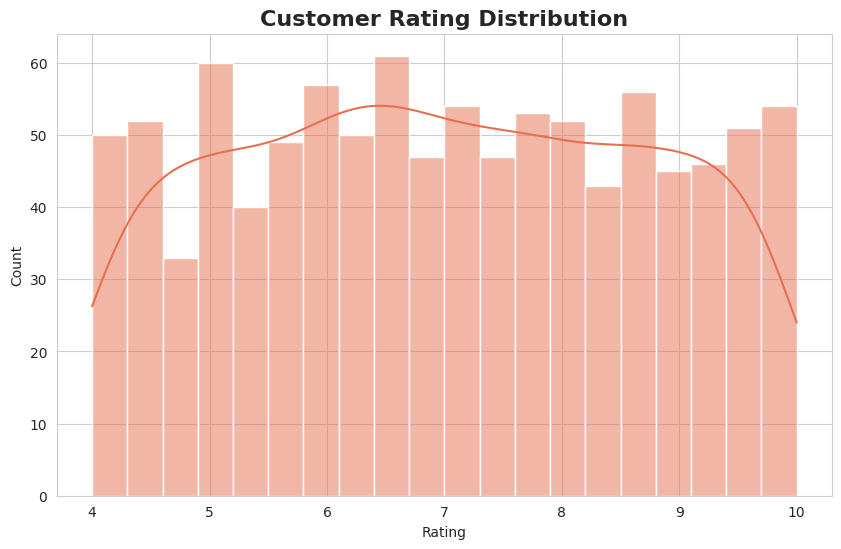

In [19]:
plt.figure()
sns.histplot(
    df["Rating"],
    bins=20,
    kde=True,
    color="#e76f51"
)

plt.title("Customer Rating Distribution", fontsize=16, fontweight="bold")
plt.xlabel("Rating")
plt.show()

Mayoritas rating berada di angka tinggi.
Ini menunjukkan tingkat kepuasan customer baik.
Namun rating rendah perlu dianalisis lebih lanjut.

/tmp/ipython-input-2366541967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


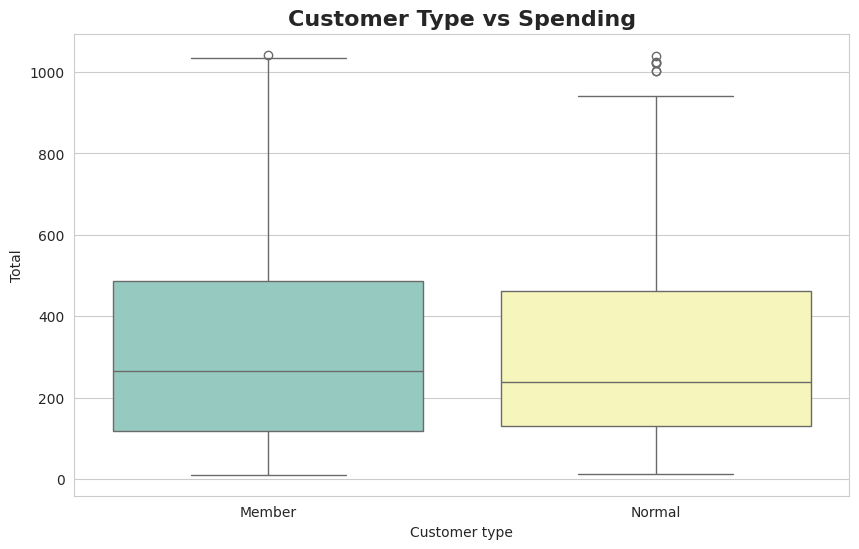

In [20]:
plt.figure()
sns.boxplot(
    x="Customer type",
    y="Total",
    data=df,
    palette="Set3"
)

plt.title("Customer Type vs Spending", fontsize=16, fontweight="bold")
plt.show()

Customer tipe **member** memiliki rata-rata pembelian lebih tinggi.
Program membership efektif meningkatkan revenue.
Perusahaan dapat meningkatkan program loyalitas.


/tmp/ipython-input-3516360978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


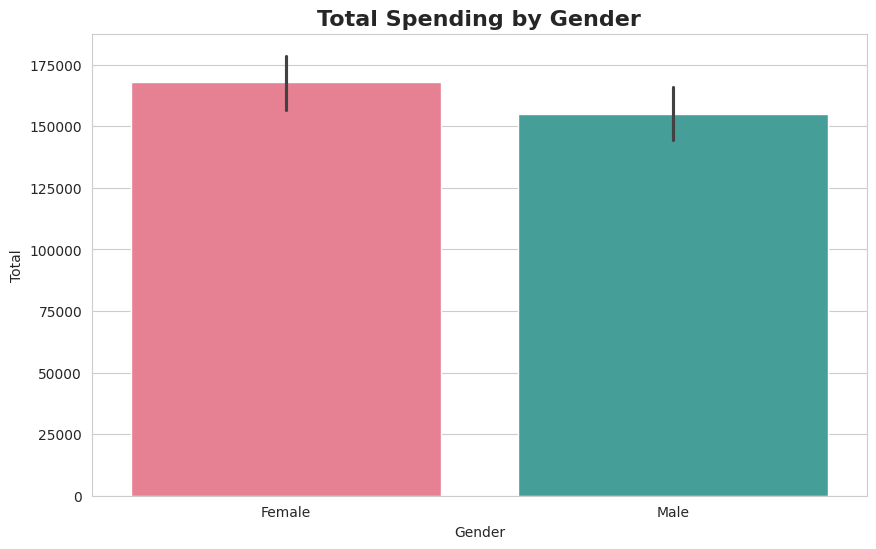

In [21]:
plt.figure()
sns.barplot(
    x="Gender",
    y="Total",
    data=df,
    estimator=sum,
    palette="husl"
)

plt.title("Total Spending by Gender", fontsize=16, fontweight="bold")
plt.show()

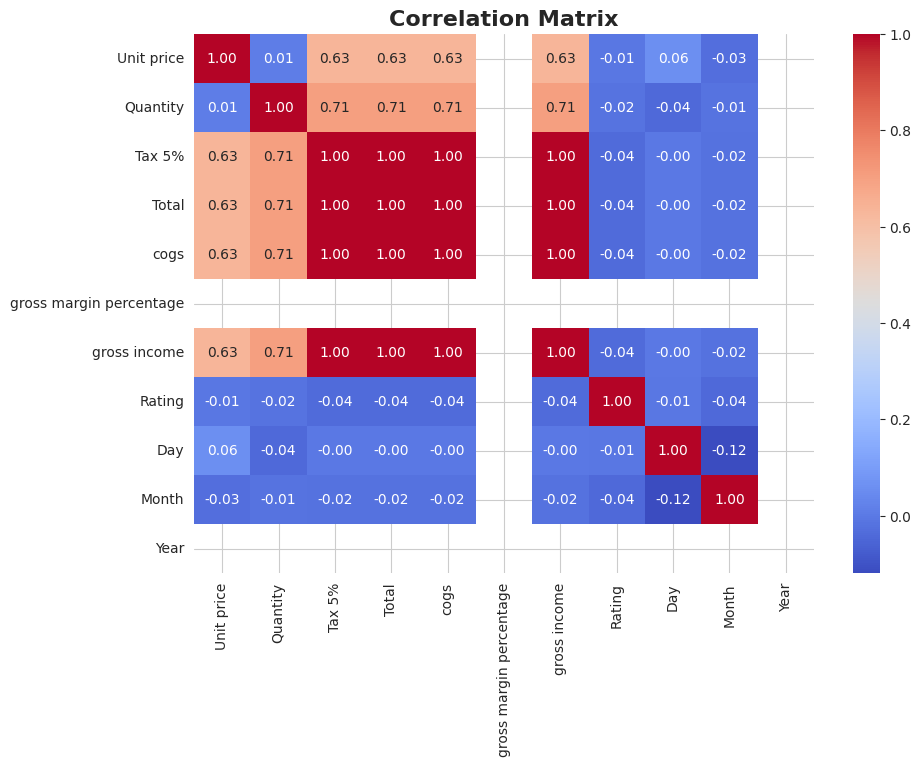

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Matrix", fontsize=16, fontweight="bold")
plt.show()

# Business Insight & Recommendation

Finding → Impact → Recommendation

# Feature


Kategori Revenue

In [23]:
df["Revenue Category"] = df["Total"].apply(
    lambda x: "High" if x > df["Total"].median() else "Low"
)

Spending per item

In [24]:
df["Spend per Item"] = df["Total"] / df["Quantity"]

Profit estimation

In [25]:
df["Estimated Profit"] = df["Total"] * 0.2

Visualisasi Feature

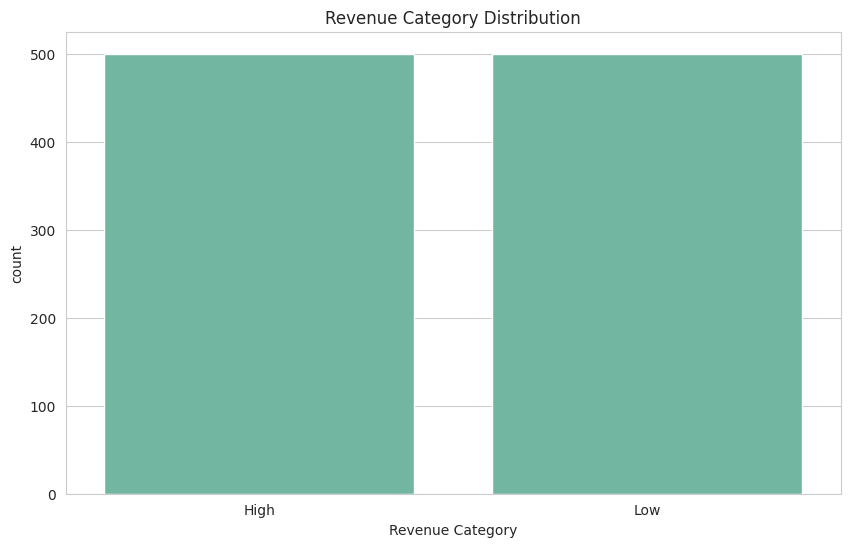

In [26]:
sns.countplot(x="Revenue Category", data=df)
plt.title("Revenue Category Distribution")
plt.show()

In [29]:
df.to_csv('/content/drive/MyDrive/Supermarket/supermarket_data_fix.csv', index=False)
print('DataFrame saved to Google Drive successfully!')

DataFrame saved to Google Drive successfully!
